In [45]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from pylab import rcParams

# The weight sensor 

In [121]:
weight = pd.read_csv('VWC + Weight.csv',  parse_dates=['Timestamp'], index_col=['Timestamp']) #convert the time column to datetime and use as index
#this will be unnecessery with our data...:
weight = weight["B01a - Weight (g)"]

In [122]:
weight.head()

Timestamp
2021-06-14 00:00:00    6167.96
2021-06-14 00:03:00    6293.54
2021-06-14 00:06:00    6242.45
2021-06-14 00:09:00    6239.87
2021-06-14 00:12:00    6239.22
Name: B01a - Weight (g), dtype: float64

In [123]:
print(f'The length of the weight df is {len(weight)} rows.')

The length of the weight df is 3359 rows.


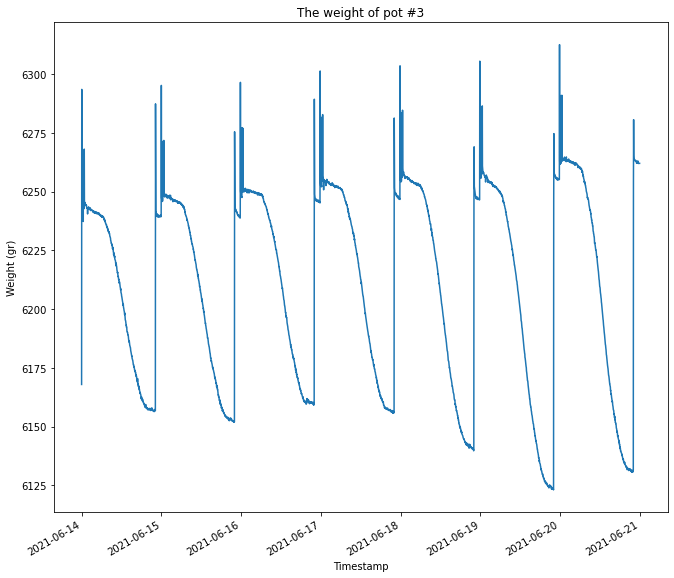

In [124]:
# visualisation of the data
ax= weight.plot(figsize=(11, 10))
ax.set_title('The weight of pot #3', fontsize=12)
ax.set_ylabel('Weight (gr)')
plt.show()

In [141]:
# get time of irrigation
def get_irrigation(df,thresh=15):
    """ when plant whas irri (df gains weight) , print the times the plant was irrigated,
    and return mask of yield 1, otherwise yield 0 
    df - df
    thresh- the min threshold of change expected due to irri"""
    
    #when df gains more than 'thresh' (20 g) the irri worked (30 sec valve opening) yield 1, otherwise yield 0
    irri = np.where(df.diff()>thresh, 1, 0) #when irri- yield 1, otherwise yield 0
    print( f'Plant #3 was irrigated {irri.sum()} times at this experiment time.')       
    return irri

In [126]:
def tran(df):
    """ get daily tarnspiration, by the wieght lost between 4:00-19:30 """
    ## only works when irrigation is in the night only.
    
    # get data at 19:30
    time730 = weight.at_time('19:30')
    time730.index = time730.index.date #so dates will meet in concat
    time730.name = '7:30PM'
    # get data at 4:00
    time4 = weight.at_time('4:00')
    time4.index = time4.index.date
    time4.name = '4AM'
    #calculate tran:
    tran= pd.concat([time4,time730], join='inner', axis=1)
    tran['tran'] = tran['4AM']- tran['7:30PM']
    tran
    
    return tran['tran']

In [127]:
def plant_gain_weight(df):
    """ get daily plant growth, by the weight gain in full turgor (at 4:00) """
    ## only works when irrigation is in the night only.
    
    # get data at 4:00
    time4 = weight.at_time('4:00')
    time4.index = time4.index.date
    time4.name = '4AM'
    
    #calculate net weight:
    net_weight = time4.diff() #gain wieght
    net_weight[0]=15 #the initial weight of a plant
    
    ## add the gain weight to get net weight
    for i in range(1,len(net_weight)):
        net_weight.iloc[i] += net_weight.iloc[i-1]
        
    return net_weight

In [128]:
a= get_irrigation(weight)

Plant #3 was irrigated 30 times at this experiment time.


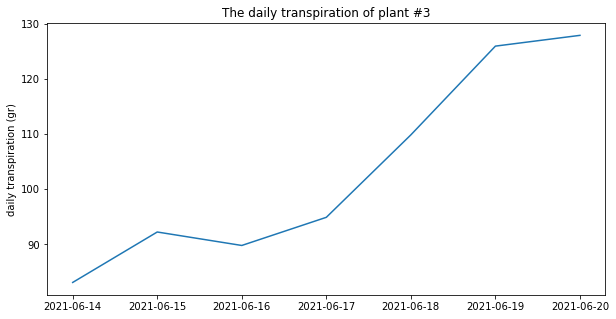

In [130]:
daily_transpiration = tran(weight)

# visualisation of the daily tran
ax= daily_transpiration.plot(figsize=(10, 5))
ax.set_title('The daily transpiration of plant #3', fontsize=12)
ax.set_ylabel('daily transpiration (gr)')
plt.show()

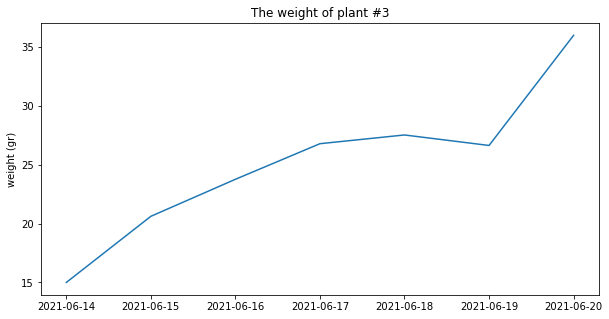

In [131]:
net_weight = plant_gain_weight(weight)

# visualisation of the daily tran
ax= net_weight.plot(figsize=(10,5))
ax.set_title('The weight of plant #3', fontsize=12)
ax.set_ylabel('weight (gr)')
plt.show()

### Time series decomposition
When visualizing time series data, you should look out for some distinguishable patterns:

* seasonality: does the data display a clear periodic pattern? 
* trend: does the data follow a consistent upwards or downward slope? 
* noise: are there any outlier points or missing values that are not consistent with the rest of the data?

#### Additive Model
An additive model suggests that the components are added together as follows:
y(t) = Level + Trend + Seasonality + Noise
--> A linear trend is a straight line.

#### Multiplicative Model
A multiplicative model suggests that the components are multiplied together as follows:
y(t) = Level * Trend * Seasonality * Noise
-->
A nonlinear trend is a curved line.

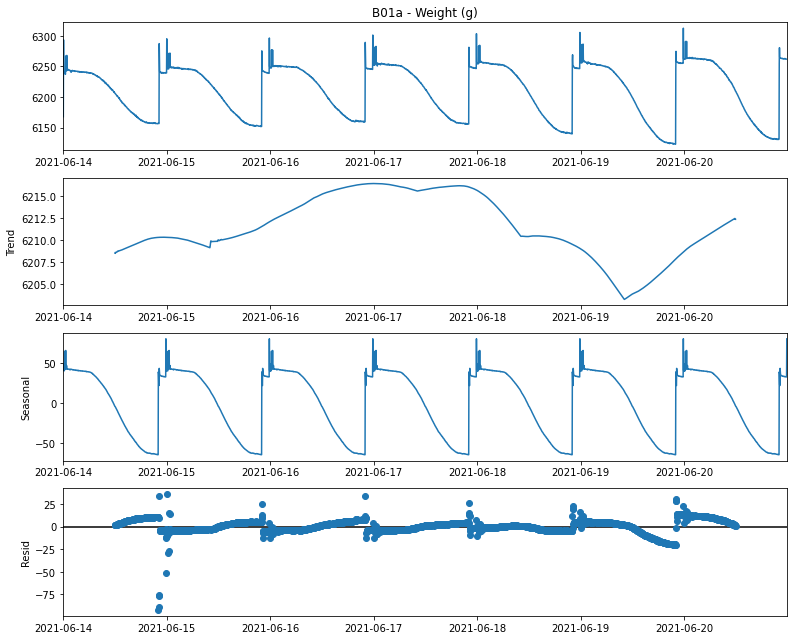

In [132]:
%matplotlib inline
decom_weight = sm.tsa.seasonal_decompose(weight , model='additive' ,period= 480) #perion: every 15min * 24h = 96
rcParams['figure.figsize'] = 11, 9
fig = decom_weight.plot()
plt.show()

# The soil moisture sensor

In [135]:
soil_moisture = pd.read_csv('VWC + Weight.csv',  parse_dates=['Timestamp'], index_col=['Timestamp']) #convert the time column to datetime and use as index
#this will be unnecessery with our data...:
soil_moisture  = soil_moisture["B01a - VWC (DIELEC/1/5TE) "]

VWC (DIELEC/1/5TE)(cm<sup>3</sup>/cm<sup>3</sup>)

In [136]:
soil_moisture.head()

Timestamp
2021-06-14 00:00:00    0.20146
2021-06-14 00:03:00    0.20146
2021-06-14 00:06:00    0.20146
2021-06-14 00:09:00    0.20146
2021-06-14 00:12:00    0.20146
Name: B01a - VWC (DIELEC/1/5TE) , dtype: float64

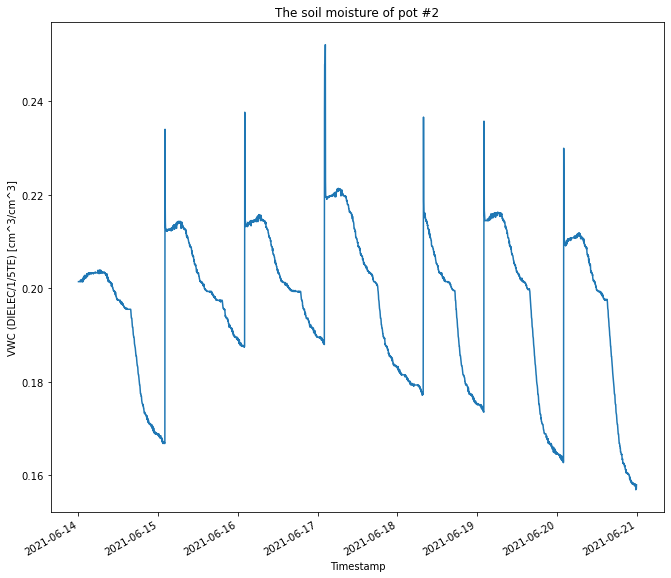

In [140]:
# visualisation of the data
ax= soil_moisture.plot(figsize=(11, 10))
ax.set_title('The soil moisture of pot #2', fontsize=12)
ax.set_ylabel('VWC (DIELEC/1/5TE) [cm^3/cm^3]')
plt.show()

In [145]:
a= get_irrigation(soil_moisture, thresh=0.03 ) #when df gains more than 0.03 the irri worked 

Plant #3 was irrigated 6 times at this experiment time.
